In [1]:
import pandas as pd 
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('./fraud_oracle.csv')
all_data = df.copy()

In [3]:
age_groups = {
    '16-17': 'Young',
    '18-20': 'Young',
    '21-25': 'Young',
    '26-30': 'Young',
    '31-35': 'Middle-aged',
    '36-40': 'Middle-aged',
    '41-50': 'Middle-aged',
    '51-65': 'Senior',
    '65+': 'Senior'
}
all_data['AgeGroup'] = all_data['AgeOfPolicyHolder'].map(age_groups)
all_data.drop(columns=['AgeOfPolicyHolder'], inplace=True)


def categorize_range(value):
    if value == 'less than 20000':
        return 'low'
    elif value in ['20000 to 29000', '30000 to 39000']:
        return 'mid'
    elif value in ['40000 to 59000', '60000 to 69000', 'more than 69000']:
        return 'high'
    else:
        return 'mid'


all_data['VehiclePrice_Cat'] = all_data['VehiclePrice'].apply(categorize_range)


In [4]:

label_encoder = LabelEncoder()


col_ordering = [
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':3,'more than 4':5 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':3,'more than 5':6}},
    {'col':'VehiclePrice','mapping':{'more than 69000':5,'20000 to 29000':1,'30000 to 39000':2,'less than 20000':0,
                                     '40000 to 59000':3,'60000 to 69000':4}},
    {'col':'AgeOfVehicle','mapping':{'new': 0, '2 years': 1, '3 years': 2, '4 years': 3, '5 years': 4, '6 years': 5, '7 years': 6, 'more than 7': 7}},
    {'col':'Year','mapping': {1994: 0, 1995: 1, 1996: 2}},
    {'col':'Days_Policy_Accident','mapping': {'none': 0, '1 to 7': 1,'8 to 15': 2,'15 to 30': 3, 'more than 30': 4}},
    {'col':'Days_Policy_Claim','mapping': {'none': 0, '1 to 7': 1,'8 to 15': 2,'15 to 30': 3, 'more than 30':4 }},
    {'col':'AddressChange_Claim','mapping': {'1 year': 1, 'no change': 0, '4 to 8 years': 4, '2 to 3 years': 2, 'under 6 months': 0.5}},
    {'col':'AgeGroup','mapping': {'Young': 0, 'Middle-aged': 1, 'Senior': 2}},
    {'col':'VehiclePrice_Cat','mapping': {'high': 2, 'mid': 1, 'low': 0}},
    {'col':'NumberOfCars','mapping': {'3 to 4': 3, '1 vehicle': 1, '2 vehicles': 2, '5 to 8': 7, 'more than 8': 9}},
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)

all_data = ord_encoder.fit_transform(all_data)




for col in all_data.columns:
    if all_data[col].dtype == 'object':
        all_data[col] = label_encoder.fit_transform(all_data[col])



c:\Users\Астемир\.pyenv\pyenv-win\versions\3.10.6\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Астемир\.pyenv\pyenv-win\versions\3.10.6\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\Астемир\.pyenv\pyenv-win\versions\3.10.6\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downc

In [5]:
all_data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,AgeGroup,VehiclePrice_Cat
0,2,5,6,6,1,6,5,1,0,2,...,0,0,0,0,1,3,0,2,-1.0,2
1,4,3,6,6,1,2,5,4,1,2,...,1,0,0,0,0,1,0,1,-1.0,2
2,10,5,0,6,1,5,10,2,1,1,...,0,0,0,0,0,1,0,1,-1.0,2
3,6,2,2,17,0,1,6,1,1,1,...,1,0,0,6,0,1,0,2,-1.0,1
4,4,5,1,6,1,6,4,2,0,2,...,0,0,0,0,0,1,0,1,-1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,4,0,17,1,6,10,5,1,1,...,0,0,0,0,0,1,2,1,-1.0,1
15416,9,5,4,13,1,1,3,1,1,1,...,0,0,0,6,0,3,2,2,-1.0,1
15417,9,5,4,17,0,1,3,1,1,2,...,0,0,0,1,0,1,2,1,-1.0,1
15418,2,1,1,17,1,5,3,2,0,1,...,0,0,0,6,0,1,2,0,-1.0,1


In [6]:
df.rename(columns = {'FraudFound_P':'Fraud'},inplace = True)
all_data.rename(columns = {'FraudFound_P':'Fraud'},inplace = True)

In [7]:
def split_random_(df):

    x_1, x_2 = train_test_split(df[df.Fraud == 1], test_size=0.05, random_state=222)
    x_3, x_4 = train_test_split(df[df.Fraud == 0 ], test_size = 0.7, random_state=333)
    data_1 = pd.concat([x_1,x_3])
    data_2 = pd.concat([x_2, x_4])
    return data_1, data_2


In [8]:
X, y = all_data.drop(columns='Fraud'), all_data.Fraud

In [9]:
X_, X_test_glob, y_, y_test_glob = train_test_split(X, y, test_size=0.2, random_state=423)

In [10]:
X_1, X_2, y_1, y_2 = train_test_split(X_, y_, test_size=0.5, random_state=42)

In [12]:
df1 = pd.concat([X_1, y_1],axis=1)
df2 = pd.concat([X_2, y_2],axis=1)


Fraud
0    5794
1     374
Name: count, dtype: int64


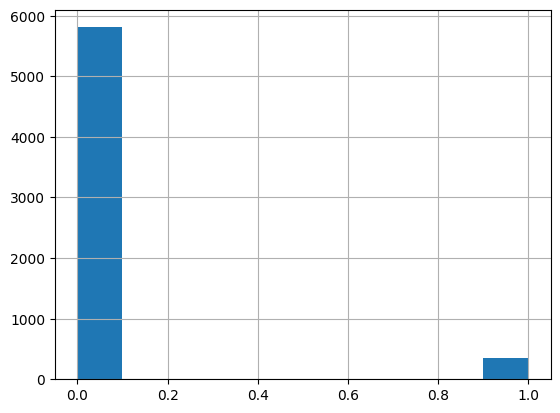

In [13]:
df1.Fraud.hist()
print(df2.Fraud.value_counts())

Fraud
0    5809
1     359
Name: count, dtype: int64


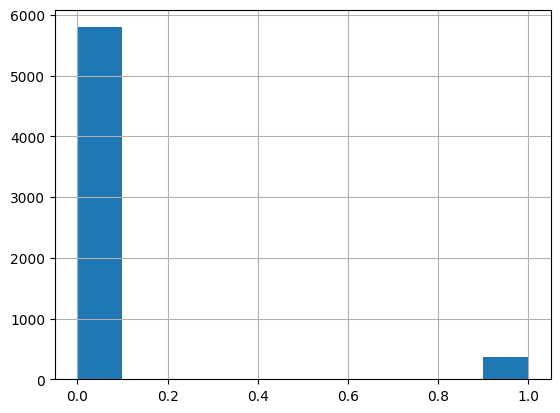

In [14]:
df2.Fraud.hist()
print(df1.Fraud.value_counts())

In [17]:
# data_1.to_csv('df_1.csv', index=False)
# data_2.to_csv('df_2.csv', index=False)


In [18]:
glob_data_test = pd.concat([X_test_glob, y_test_glob], axis=1)
glob_data_test.to_csv('test_glob.csv', index=False)

In [48]:
df1.to_csv('IID_df_1.csv', index=False)
df2.to_csv('IID_df_2.csv', index=False)

In [15]:
df_for_clients = pd.concat([X_, y_], axis=1)

data1, data2 = split_random_(df_for_clients)

In [16]:
data1

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,AgeGroup,VehiclePrice_Cat,Fraud
3053,0,4,0,13,1,1,7,3,1,2,...,0,0,0,0,1,0,0,-1.0,1,1
14471,11,2,0,6,1,7,12,4,1,1,...,0,0,1,0,1,2,0,-1.0,0,1
6868,10,1,1,2,1,7,11,1,1,1,...,0,0,0,0,1,1,1,-1.0,1,1
11296,0,1,6,2,0,7,9,1,1,1,...,0,0,1,0,1,1,1,-1.0,2,1
5473,1,1,5,13,0,5,2,2,1,1,...,0,0,0,0,1,0,0,-1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,4,2,3,17,1,6,5,2,1,1,...,0,0,0,0,1,0,2,-1.0,1,0
8592,9,5,5,6,1,7,10,5,1,1,...,0,0,1,0,1,1,2,-1.0,1,0
12099,6,1,5,2,1,5,12,4,1,1,...,0,0,0,0,1,2,1,-1.0,1,0
10834,3,2,6,6,1,5,4,2,1,2,...,0,0,0,0,1,1,2,-1.0,2,0


In [17]:
data2

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,AgeGroup,VehiclePrice_Cat,Fraud
8747,2,4,4,17,1,5,3,5,0,1,...,0,0,0,0,1,1,1,-1.0,0,1
5494,1,1,4,17,1,2,2,2,1,1,...,0,0,0,0,3,0,1,-1.0,1,1
11210,0,1,3,6,0,2,1,3,1,2,...,0,0,0,0,1,1,1,-1.0,1,1
11121,7,5,6,13,1,6,7,2,1,2,...,0,0,0,0,1,1,0,-1.0,1,1
13488,5,2,6,13,1,2,6,3,0,2,...,0,0,0,0,1,2,1,-1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14467,2,3,4,6,1,2,3,3,1,1,...,0,0,0,0,1,2,1,-1.0,2,0
7830,6,1,5,9,1,6,6,1,1,1,...,0,0,6,0,1,1,2,-1.0,1,0
8351,8,1,0,6,1,1,9,3,1,1,...,0,0,3,0,1,1,1,-1.0,1,0
168,8,4,0,12,0,7,6,2,1,1,...,0,0,0,4,2,0,0,-1.0,2,0


Fraud
0    3480
1     696
Name: count, dtype: int64


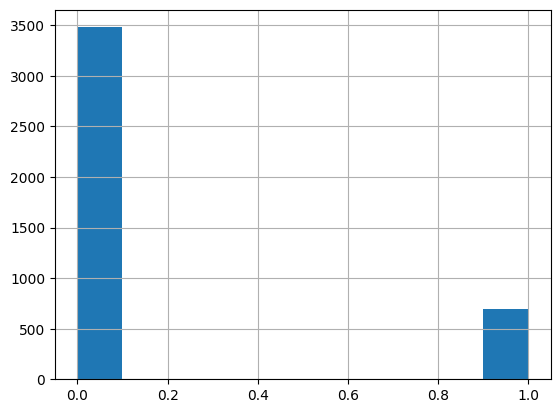

In [21]:
data1.Fraud.hist()
print(data1.Fraud.value_counts())

Fraud
0    8123
1      37
Name: count, dtype: int64


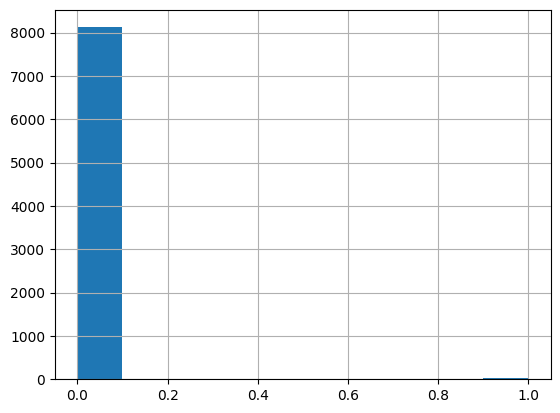

In [23]:
data2.Fraud.hist()
print(data2.Fraud.value_counts())

In [24]:
data1.to_csv("Non_IID_1.csv", index=False)
data2.to_csv("Non_IID_2.csv", index=False)